<a href="https://colab.research.google.com/github/MinerMunch/ML-For-Beginners/blob/main/7-EdgeImpulse/MLME24_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import tensorflow as tf
import numpy as np
import os

# Tutorial 1: Continous Motion Recognition
The project [https://studio.edgeimpulse.com/public/14299/latest](https://studio.edgeimpulse.com/public/14299/latest)

In [61]:
# no cloning needed, the following are extracted from the project page dashboard for auto downloads
PROJECT_ID=412593
DSP_ID=31
LRN_ID=35

# if there is no data subfolder, create one, and get the data inside it; -q flag is for quiet mode

if not os.path.exists('data1'):
    os.makedirs('data1')
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/x/training -O data1/X_split_train.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/y/training -O data1/Y_split_train.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/x/testing -O data1/X_split_test.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/y/testing -O data1/Y_split_test.npy


In [62]:
# THE MODEL
if not os.path.exists('model1'):
    os.makedirs('model1')
!wget https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/learn-data/$LRN_ID/model/tflite-h5 -O model1/model1.zip

# unzip model1.zip quitely as model1.h5 and remove model1.zip
!cd model1 && unzip -q model1.zip
!rm model1/model1.zip
!cd ..

--2025-10-20 13:11:50--  https://studio.edgeimpulse.com/v1/api/412593/learn-data/35/model/tflite-h5
Resolving studio.edgeimpulse.com (studio.edgeimpulse.com)... 13.225.47.112, 13.225.47.125, 13.225.47.30, ...
Connecting to studio.edgeimpulse.com (studio.edgeimpulse.com)|13.225.47.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘model1/model1.zip’

model1/model1.zip       [ <=>                ]   6.05K  --.-KB/s    in 0s      

2025-10-20 13:11:51 (534 MB/s) - ‘model1/model1.zip’ saved [6199]

replace model.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [63]:
model = tf.keras.models.load_model('model1/model.h5')

In [64]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ y_pred (Dense)                  │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,056 (4.13 KB)

 Trainable params: 1,054 (4.12 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [65]:
test_data = np.load('data1/X_split_test.npy')
test_labels = np.load('data1/Y_split_test.npy')

In [66]:
# The labels are in the first column and go like "idle", "snake", "updown", "wave, and "anomaly" or "other"?
test_labels[:,0]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [67]:
predictions = model.predict(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [68]:
np.argmax(predictions, axis = 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [69]:
# For calculating the accuracy we substract -1 from the test labels and add +1 to the predictions
accuracy = np.mean(1+np.argmax(predictions, axis = 1) == (test_labels[:,0]-1))
print(f'Accuracy: {accuracy * 100: .2f}%')

Accuracy:  97.21%


# Tutorial 2: Responding to Voice

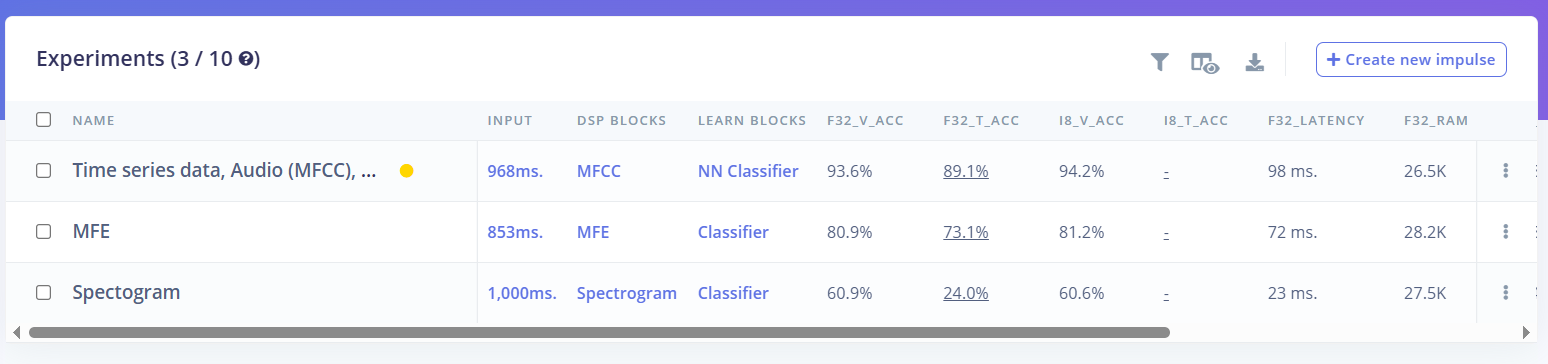

In [70]:
# Models with a higher number of epochs had higher accuracy. That made the must difference. More data was added through a mobile phone with recordings
PROJECT_ID=791919
DSP_ID=25
LRN_ID=5

# if there is no data subfolder, create one, and get the data inside it; -q flag is for quiet mode

if not os.path.exists('data2'):
    os.makedirs('data2')
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/x/training -O data/X_split_train.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/y/training -O data/Y_split_train.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/x/testing -O data/X_split_test.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/y/testing -O data/Y_split_test.npy


In [71]:
# THE MODEL
!wget https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/learn-data/$LRN_ID/model/tflite-h5 -O model2.zip

# unzip quitely and remove model2.zip
!unzip -q model2.zip
!rm model2.zip
!ls

--2025-10-20 13:12:38--  https://studio.edgeimpulse.com/v1/api/791919/learn-data/5/model/tflite-h5
Resolving studio.edgeimpulse.com (studio.edgeimpulse.com)... 13.225.47.30, 13.225.47.125, 13.225.47.112, ...
Connecting to studio.edgeimpulse.com (studio.edgeimpulse.com)|13.225.47.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘model2.zip’

model2.zip              [ <=>                ]  16.00K  --.-KB/s    in 0s      

2025-10-20 13:12:39 (32.2 MB/s) - ‘model2.zip’ saved [16381]

replace model.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
data  data1  data2  model1  model.h5  sample_data


In [72]:
model = tf.keras.models.load_model('model.h5')

In [73]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise (GaussianNoise)  │ (None, 624)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 48, 13, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 13, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 7, 8)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 7, 8)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 7, 16)      │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 4, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 4, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ y_pred (Dense)                  │ (None, 3)              │         2,307 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,557 (13.90 KB)

 Trainable params: 3,555 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [74]:
test_data = np.load('data/X_split_test.npy')
test_labels = np.load('data/Y_split_test.npy')

In [75]:
# The labels are in the first column and go like 1=helloworld, 2=noise, 3=unknown
test_labels[:,0]

array([1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,

In [76]:
predictions = model.predict(test_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [77]:
np.argmax(predictions, axis = 1)

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [78]:
# For calculating the accuracy we substract -1
test_labels[:,0]-1

array([0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [79]:
accuracy = np.mean(np.argmax(predictions, axis = 1) == (test_labels[:,0]-1))

In [80]:
print(f'Accuracy: {accuracy * 100: .2f}%')

Accuracy:  90.80%


# Tutorial 3: Recognize sounds from audio
https://studio.edgeimpulse.com/public/14301/latest

In [81]:
# no cloning needed, the following are extracted from the project page dashboard for auto downloads
PROJECT_ID=417225
DSP_ID=24
LRN_ID=28

# if there is no data subfolder, create one, and get the data inside it; -q flag is for quiet mode

if not os.path.exists('data3'):
    os.makedirs('data3')
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/x/training -O data3/X_split_train.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/y/training -O data3/Y_split_train.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/x/testing -O data3/X_split_test.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/y/testing -O data3/Y_split_test.npy


In [82]:
# THE MODEL
if not os.path.exists('model3'):
    os.makedirs('model3')
!wget https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/learn-data/$LRN_ID/model/tflite-h5 -O model3/model3.zip

# unzip model1.zip quitely as model1.h5 and remove model1.zip
!cd model3 && unzip -q model3.zip
!rm model3/model3.zip
!cd ..

--2025-10-20 13:12:52--  https://studio.edgeimpulse.com/v1/api/417225/learn-data/28/model/tflite-h5
Resolving studio.edgeimpulse.com (studio.edgeimpulse.com)... 13.225.47.30, 13.225.47.125, 13.225.47.112, ...
Connecting to studio.edgeimpulse.com (studio.edgeimpulse.com)|13.225.47.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘model3/model3.zip’

model3/model3.zip       [ <=>                ]  12.99K  --.-KB/s    in 0s      

2025-10-20 13:12:53 (78.2 MB/s) - ‘model3/model3.zip’ saved [13298]



In [83]:
model = tf.keras.models.load_model('model3/model.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 99, 65)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 99, 8)          │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 50, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 50, 16)         │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 25, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ y_pred (Dense)                  │ (None, 2)              │           802 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,772 (10.83 KB)

 Trainable params: 2,770 (10.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [84]:
test_data = np.load('data3/X_split_test.npy')
test_labels = np.load('data3/Y_split_test.npy')

In [85]:
test_labels[:,0]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [86]:
predictions = model.predict(test_data)
np.argmax(predictions, axis = 1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [87]:
accuracy = np.mean(np.argmax(predictions, axis = 1) == (test_labels[:,0]-1))
print(f'Accuracy: {accuracy * 100: .2f}%')

Accuracy:  100.00%


# Tutorial 4: Adding sight to your sensors
https://studio.edgeimpulse.com/public/14227/latest

Note that this did not work with tensorflow==2.17.0 so we downgraded to tensorflow==2.12.0. We need to check fresh if this causes problems for other tutorials. Better solution is to retrain the model and save in a newer format, and use the new .h5 instead of the original project. We could easily do this with the cloned version of the project?

**Sensor & Block Information**
- Image data
- Image DSP block for normalizing image files
- Transfer Learning block with prediction outputs: "lamp", "plant", "unknown"

In [88]:
import tensorflow as tf

In [89]:
# no cloning needed, the following are extracted from the project page dashboard for auto downloads
PROJECT_ID=792097
DSP_ID=31
LRN_ID=19

# if there is no data subfolder, create one, and get the data inside it; -q flag is for quiet mode

if not os.path.exists('data4'):
    os.makedirs('data4')
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/x/training -O data4/X_split_train.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/y/training -O data4/Y_split_train.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/x/testing -O data4/X_split_test.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/y/testing -O data4/Y_split_test.npy


In [90]:
# We work with the Tensorflow Lite (float32) model instead of h5
# Otherwise we need to downgrade TF version
!wget https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/learn-data/$LRN_ID/model/tflite-savedmodel -O model4/model4.zip
!cd model4 && unzip -q model4.zip
!rm model4/model4.zip
!cd ..

model4/model4.zip: No such file or directory
/bin/bash: line 1: cd: model4: No such file or directory
rm: cannot remove 'model4/model4.zip': No such file or directory


In [91]:
# load the saved_model tflite form the folder not h5
model = tf.keras.layers.TFSMLayer('model4/saved_model', call_endpoint='serving_default')

OSError: SavedModel file does not exist at: model4/saved_model/{saved_model.pbtxt|saved_model.pb}

In [ ]:
test_data = np.load('data4/X_split_test.npy')
test_labels = np.load('data4/Y_split_test.npy')
test_labels[:,0]

In [ ]:
# Reshape test_data to match the expected input shape of the model
test_data = test_data.reshape((-1, 96, 96, 3))

# Get the serving_default signature from the model
# Access the underlying loaded object from TFSMLayer
infer = model._reloaded_obj.signatures['serving_default']

# Run inference using the signature
predictions = infer(tf.constant(test_data, dtype=tf.float32))

# The output key might vary, need to check the model's output signature
# Assuming the output key is 'output_0' based on Tutorial 5A
prediction_results = predictions['output_0'].numpy()

np.argmax(prediction_results, axis = 1)

In [ ]:
# calculate accuracy
predicted_indices = np.argmax(prediction_results, axis = 1)
accuracy = np.mean(predicted_indices == (test_labels[:,0]-1))
print(f'Accuracy: {accuracy * 100: .2f}%')

# TODO Tutorial 5A: Object Detection
https://studio.edgeimpulse.com/public/25483/latest

Since the project involves an embedded devices, Keras h5 model is not created.

Trying with tf_lite


In [ ]:
# no cloning needed, the following are extracted from the project page dashboard for auto downloads
PROJECT_ID=408972
DSP_ID=3
LRN_ID=5

# if there is no data subfolder, create one, and get the data inside it; -q flag is for quiet mode

if not os.path.exists('data5a'):
    os.makedirs('data5a')
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/x/training -O data5a/X_split_train.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/y/training -O data5a/Y_split_train.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/x/testing -O data5a/X_split_test.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/y/testing -O data5a/Y_split_test.npy


In [ ]:
# THE MODEL
if not os.path.exists('model5a'):
    os.makedirs('model5a')
!wget https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/learn-data/$LRN_ID/model/tflite-savedmodel -O model5a/model5a.zip

# unzip model1.zip quitely as model1.h5 and remove model1.zip
!cd model5a && unzip -q model5a.zip
!rm model5a/model5a.zip
!cd ..

In [ ]:
# load a TensorFlow SavedModel for example https://studio.edgeimpulse.com/v1/api/408972/learn-data/5/model/tflite-savedmodel
model = tf.saved_model.load('model5a/saved_model')
# model.summary() #No keras model


In [ ]:
test_data = np.load('data5a/X_split_test.npy')

In [ ]:
# For y, we read the byte file directly witout np.load()
with open('data5a/Y_split_test.npy', 'rb') as f:
    content = f.read()

In [ ]:
# TODO data = json.loads(json_str)

In [ ]:
# Extract the labels
labels = []

for sample in data['samples']:
    for box in sample['boundingBoxes']:
        labels.append(box['label'])

print(labels)

In [ ]:
infer = model.signatures['serving_default']

In [ ]:
# Convert the input data to a tensor
input_tensor = tf.convert_to_tensor(test_data)

In [ ]:
# Run inference
predictions = infer(input_tensor)

In [ ]:
# Extract the prediction results
prediction_results = predictions['output_0'].numpy()  # Adjust the key based on your model's output signature

print(prediction_results)

# TODO Tutorial 5B: Object detection FOMO
https://studio.edgeimpulse.com/public/90393/latest


TODO: the label data must differ being bounding box. Check how to load!!!

TODO: add README



In [ ]:
# no cloning needed, the following are extracted from the project page dashboard for auto downloads
PROJECT_ID=90395
DSP_ID=3
LRN_ID=5

# if there is no data subfolder, create one, and get the data inside it; -q flag is for quiet mode

if not os.path.exists('data5b'):
    os.makedirs('data5b')
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/x/training -O data5b/X_split_train.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/y/training -O data5b/Y_split_train.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/x/testing -O data5b/X_split_test.npy
    !wget -q https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/dsp-data/$DSP_ID/y/testing -O data5b/Y_split_test.npy


In [ ]:
# THE MODEL
if not os.path.exists('model5b'):
    os.makedirs('model5b')
!wget https://studio.edgeimpulse.com/v1/api/$PROJECT_ID/learn-data/$LRN_ID/model/tflite-h5 -O model5b/model5b.zip

# unzip model1.zip quitely as model1.h5 and remove model1.zip
!cd model5b && unzip -q model5b.zip
!rm model5b/model5b.zip
!cd ..

In [ ]:
model = tf.keras.models.load_model('model5b/model.h5')
model.summary()

In [ ]:
test_data = np.load('data5b/X_split_test.npy')
